In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
print(len(clusters))
print(len(shapes))

3769
89474


In [5]:
# Print the numbers of galaxies that needed to be masked


print(np.sum(shapes[('All','e1')]==-9999))
print(np.sum(shapes[('All','e2')]==-9999))
print(np.sum(shapes['All','flags_select']==0))
print(np.sum(shapes[('All','PP')]<=0.55))

0
0
89474
0


In [6]:
#masking
print(len(clusters))
print(len(shapes))

3769
89474


# Stats of e1,e2

count    89474.000000
mean        -0.000693
std          0.150682
min         -0.693726
25%         -0.078246
50%         -0.000489
75%          0.076832
max          0.775665
Name: (All, e2), dtype: float64

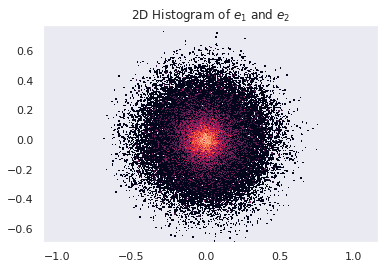

In [7]:
from matplotlib.colors import LogNorm 
plt.hist2d(shapes['All','e1'],shapes['All','e2'],bins=500,norm=LogNorm())
plt.axis('equal')
plt.title("2D Histogram of $e_1$ and $e_2$")
pd.Series(shapes['All','e1']).describe()
pd.Series(shapes['All','e2']).describe()

count    89474.000000
mean         2.203350
std        339.119245
min     -12001.081281
25%         -1.006322
50%          0.001233
75%          1.001861
max      67310.028672
dtype: float64

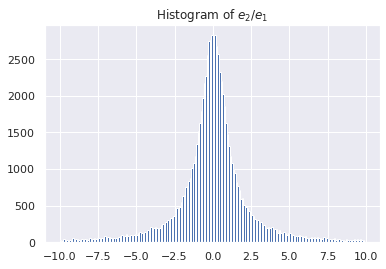

In [8]:
#statistics and hisgoram of e2/e1
plt.hist(shapes['All','e2']/shapes['All','e1'],bins=np.arange(-10,10,0.1))
plt.title("Histogram of $e_2$/$e_1$")
pd.Series(shapes['All','e2']/shapes['All','e1']).describe()

# Get phi 

In [9]:
def get_std_err_of_mean(np_array):
    mean=np_array.mean()
    std=np_array.std()
    n=len(np_array)
    return(std/np.sqrt(n))

In [10]:
phi_1d=shapes[('All','phi')]

## Stats for unweighted

In [11]:
pd.Series(phi_1d).describe()
print("Mean:{:05e} \nStdE:{:05e} ".format(phi_1d.mean(),phi_1d.std()/np.sqrt(len(phi_1d))))

Mean:4.523202e+01 
StdE:8.617786e-02 


count    89474.000000
mean        45.232024
std         25.777697
min          0.000277
25%         22.500000
50%         45.246282
75%         67.500000
max         89.998205
Name: (All, phi), dtype: float64

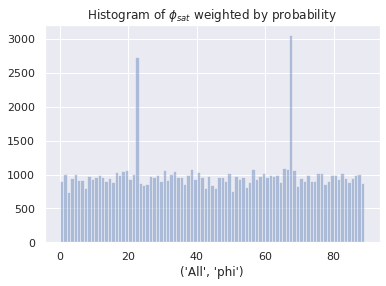

In [12]:
BINS=np.arange(0,90,1)
ax = sns.distplot(shapes[('All','phi')],bins=BINS,kde=False)
ax.set_title("Histogram of $\phi_{sat}$ weighted by probability") 
pd.Series(phi_1d).describe()

# Abnormal Analysis

In [13]:
np.sum((shapes[('All','phi')]>=22.4) &(shapes[('All','phi')]<=22.6)) 
abn_1 = shapes[(shapes[('All','phi')]>=22.4) &(shapes[('All','phi')]<=22.6)]
abn_2 = shapes[(shapes[('All','phi')]>67.4) &(shapes[('All','phi')]<=67.6)]

In [14]:
corr_1=abn_1.corr(method='pearson')[('All','phi')]
corr_2=abn_2.corr(method='pearson')[('All','phi')]

In [15]:
display(HTML((pd.concat([pd.DataFrame(corr_1),pd.DataFrame(corr_2)],axis=1)).to_html()))
# display(corr_2.to_html())

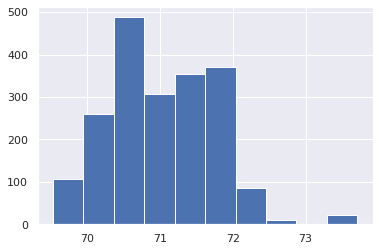

In [16]:
abn_1[('All','RA')].hist()
#RA of objects with ϕ=22.5

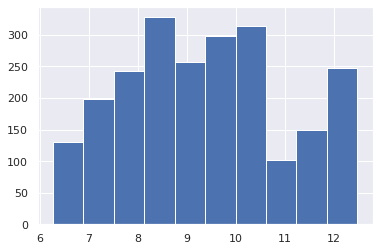

In [17]:
abn_2[('All','RA')].hist()
#RA of objects with ϕ=67.5

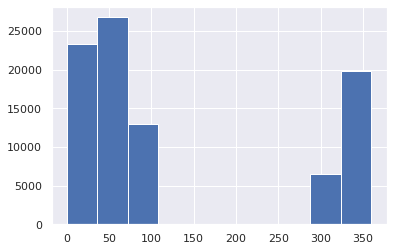

In [18]:
shapes[('All','RA')].hist()
#RA of all objects

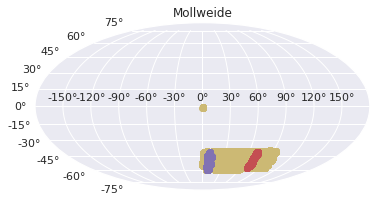

In [19]:
abn_1_Coor=SkyCoord(abn_1['All','RA'],abn_1['All','DEC'],unit=u.deg)
abn_2_Coor=SkyCoord(abn_2['All','RA'],abn_2['All','DEC'],unit=u.deg)
shape_Coor=SkyCoord(shapes['All','RA'],shapes['All','DEC'],unit=u.deg)


plt.figure()
plt.subplot(111, projection="mollweide")
plt.title("Mollweide")
plt.grid(True)
plt.scatter(shape_Coor.ra.radian, shape_Coor.dec.radian,color='y')
plt.scatter(abn_1_Coor.ra.radian, abn_1_Coor.dec.radian,color='r')
plt.scatter(abn_2_Coor.ra.radian, abn_2_Coor.dec.radian,color='m')
plt.show()

In [20]:
# np.save("/home/cz136/project/sa/data/im3_225_id.npy",abn_1.index.to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_id.npy",abn_2.index.to_numpy())
# np.save("/home/cz136/project/sa/data/im3_225_ra.npy",abn_1[('All','ra')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_225_dec.npy",abn_1[('All','dec')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_ra.npy",abn_2[('All','ra')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_dec.npy",abn_2[('All','dec')].to_numpy())

# Analysis around 22.5 and 67.5

In [21]:
#Print out the most crowded bins

phi_count=np.histogram(phi_1d,bins=BINS)
sort=np.argsort(-phi_count[0])
print(phi_count[1][sort])
print(phi_count[0][sort])

[67 22 65 66 56 38 68 30 19 18 33 40 16 75 82 76 59 49 21 87  4 32  1 79
 80 61 86 37 17 11 63 72 28 51 43 62 58  8 26 12 60 47 27 41 53 35 10 46
 34 70  3 83 14 85 39 20 57 52  9 81  5  6 31 73  0 78 48 74 71 29 13 64
 15 84 55 88 23 77 36 25 24 44 69 54 45 42  7 50  2]
[3057 2730 1093 1081 1081 1077 1067 1066 1063 1056 1052 1045 1031 1027
 1021 1018 1017 1016 1009 1008 1005 1004 1001  998  997  993  993  993
  992  991  990  990  987  985  985  983  975  973  972  970  966  966
  963  963  963  963  958  957  957  956  956  949  947  943  940  935
  933  933  933  932  923  922  918  912  911  907  907  907  903  899
  898  891  889  886  883  882  871  867  862  859  851  839  836  817
  805  804  795  757  744]


count    3057.000000
mean       22.577417
std         0.272755
min        22.001519
25%        22.500000
50%        22.500000
75%        22.539473
max        23.467325
Name: (All, phi), dtype: float64

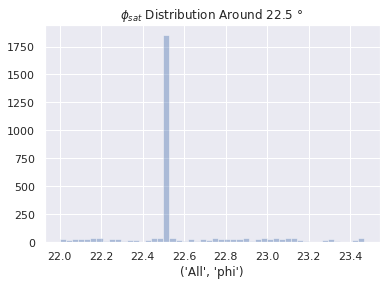

In [22]:
#Statistics around 22.5
first_cluster_left=np.sum(phi_count[0][0:22])
first_length=phi_count[0][sort][0]
first_cluster=phi_1d[first_cluster_left:first_cluster_left+first_length]
ax = sns.distplot(first_cluster,kde=False)
ax.set_title("$\phi_{sat}$ Distribution Around 22.5 $\degree$")
pd.Series(first_cluster).describe()

count    3057.000000
mean       67.498126
std         0.165787
min        67.000614
25%        67.500000
50%        67.500000
75%        67.500000
max        67.999551
Name: (All, phi), dtype: float64

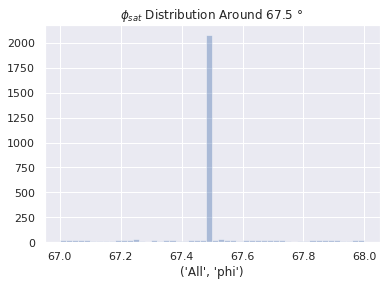

In [23]:
second_cluster_left=np.sum(phi_count[0][0:67])
second_length=phi_count[0][sort][0]
second_cluster=phi_1d[second_cluster_left:second_cluster_left+second_length]
ax = sns.distplot(second_cluster,kde=False)
ax.set_title("$\phi_{sat}$ Distribution Around 67.5 $\degree$")
pd.Series(second_cluster).describe()

# Get e

## Statistics of e1 and e2

In [24]:
e1=shapes[('All','e1')].to_numpy()
shapes[('All','e1')].describe()

count    89474.000000
mean        -0.000082
std          0.150186
min         -0.687860
25%         -0.076607
50%         -0.000325
75%          0.076491
max          0.756333
Name: (All, e1), dtype: float64

In [25]:
e2=shapes[('All','e1')].to_numpy()
shapes[('All','e2')].describe()

count    89474.000000
mean        -0.000693
std          0.150682
min         -0.693726
25%         -0.078246
50%         -0.000489
75%          0.076832
max          0.775665
Name: (All, e2), dtype: float64

In [26]:
# np.save("/home/cz136/project/sa/data/{}/e_array".format(dir_string),e_list)

In [27]:
e_p_1d=shapes[('All','ep')]
e_x_1d=shapes[('All','ex')]

mean=-7.612042e-04, std_mean=5.048833e-04


count    89474.000000
mean        -0.000761
std          0.151022
min         -0.705929
25%         -0.080033
50%         -0.000385
75%          0.077548
max          0.683721
Name: (All, ep), dtype: float64

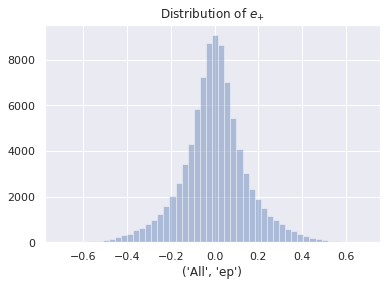

In [28]:
ax=sns.distplot(e_p_1d,kde=False)
ax.set_title("Distribution of $e_{+}$")
print ("mean={:05e}, std_mean={:05e}".format(e_p_1d.mean(),get_std_err_of_mean(e_p_1d)))
pd.Series(e_p_1d).describe()

mean=1.764277e-03, std_mean=5.009121e-04


count    89474.000000
mean         0.001764
std          0.149834
min         -0.750668
25%         -0.074119
50%          0.004397
75%          0.077838
max          0.766395
Name: (All, ex), dtype: float64

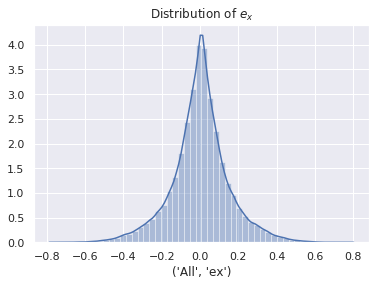

In [29]:
ax=sns.distplot(e_x_1d)
ax.set_title("Distribution of $e_{x}$")
print ("mean={:05e}, std_mean={:05e}".format(e_x_1d.mean(),get_std_err_of_mean(e_x_1d)))
pd.Series(e_x_1d).describe()